In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This is project attemping to solve the yelp challenge, and the objective is to predict starts that user give based on user properties: https://www.yelp.com/dataset

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data=pd.read_csv("Data_Final.csv")
data.drop(data.columns[[0]], axis=1, inplace=True)
data.head(5)

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79


In [ ]:
data.shape

NameError: ignored

In [ ]:
sns.countplot(data.Bus_Ave_Star)

NameError: ignored

In [ ]:
X=data['Star'].groupby(data['City'])
print(X.mean().sort_values(ascending=False))
X.mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))

In [ ]:
X=data['User_Review_count'].groupby(data['City'])
print(X.mean().sort_values(ascending=False))
X.mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))

In [ ]:
X=data['User_Review_count'].groupby(data['Bus_id'])
print(X.sum().sort_values(ascending=False)[0:20])
X.sum().sort_values(ascending=True)[len(X)-20:len(X)].plot(kind='barh',figsize=(10, 8),color="green")

In [ ]:
X=data['Bus_Ave_Star'].groupby(data['Bus_id'])
print(X.mean().sort_values(ascending=False))

## **Text Analysis**

In [ ]:
review_df = data[['Star','Review']]
review_df.head()

In [ ]:
review_df.shape

In [ ]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [ ]:
#don't run this yet
review_df_new = review_df.copy()
review_df_new['Review'] = review_df_new['Review'].apply(remove_punc_stopword)
review_df_new.count()

In [ ]:
review_df_new = review_df.copy()
review_df_new_test = review_df_new.iloc[0:1000,]

In [ ]:
review_df_new_test['Review'] = review_df_new_test['Review'].apply(remove_punc_stopword)
review_df_new_test.count()

In [ ]:
review_df_new_test.head()

In [ ]:
review_df_new_test1 = review_df_new_test['Review'].values

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(review_df_new_test1))

fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)


In [ ]:
type(review_df_new_test)

In [ ]:
test = ' '.join(review_df_new_test.iloc[0,1])

In [ ]:
TextBlob(test).sentiment.polarity

In [ ]:
review_df_new_test['Review'] = review_df_new_test['Review'].str.join(' ')

In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
review_df_new_test['Review_polarity'] = review_df_new_test['Review'].apply(compute_polarity)

In [ ]:
review_df_new_test['Review_subjectivity'] = review_df_new_test['Review'].apply(compute_subjectivity)

In [ ]:
review_df_new_test

In [ ]:
Y = pd.DataFrame(review_df_new_test["Star"].values)
X = pd.DataFrame(review_df_new_test["Review_polarity"].values)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
reg.score(x_test,y_test)

In [ ]:
type(x_train)

On the Entire Dataset (long runtime)

In [ ]:
data_test = data.copy()

In [ ]:
data_test['Review'] = data_test['Review'].apply(remove_punc_stopword)

In [ ]:
data_test['Review'] = data_test['Review'].str.join(' ')
data_test['Review_polarity'] = data_test['Review'].apply(compute_polarity)
data_test['Review_subjectivity'] = data_test['Review'].apply(compute_subjectivity)

In [ ]:
X = data_test[['Useful','Cool','Funny','Bus_Ave_Star','User_Review_count','User_Useful_count','User_Funny_count','User_Cool_count','User_Fans','Users_Ave_Star','Review_polarity','Review_subjectivity']]
Y = data_test['Star']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
x_train

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [ ]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

In [ ]:
sorted_indices = np.argsort(importances)[::-1]

feat_labels = X.columns

for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

Let us try playing around with the stars, let starts > 3 be 1 otherwise 0.

In [ ]:
def label(text):
    if text > 3:
        return 1
    else:
        return 0


In [ ]:
review_df_new_test['label'] = review_df_new_test['Star'].apply(label)

In [ ]:
review_df_new_test

In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [ ]:
review_df_new_test['Review'] = review_df_new_test['Review'].str.join(' ')
review_df_new_test['Review_polarity'] = review_df_new_test['Review'].apply(compute_polarity)
review_df_new_test['Review_subjectivity'] = review_df_new_test['Review'].apply(compute_subjectivity)

In [ ]:
review_df_new_test

In [ ]:
X = review_df_new_test[['Review_polarity','Review_subjectivity']]
Y = review_df_new_test['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [ ]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

Change stars to 0-1 label: on the entire dataset (long runtime)

In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def label(text):
    if text > 3:
        return 1
    else:
        return 0


In [ ]:
data_test = data.copy()
data_test['Review'] = data_test['Review'].apply(remove_punc_stopword)
data_test['Review'] = data_test['Review'].str.join(' ')
data_test['Review_polarity'] = data_test['Review'].apply(compute_polarity)
data_test['Review_subjectivity'] = data_test['Review'].apply(compute_subjectivity)
data_test['label'] = data_test['Star'].apply(label)

In [ ]:
X = data_test[['Useful','Cool','Funny','Bus_Ave_Star','User_Review_count','User_Useful_count','User_Funny_count','User_Cool_count','User_Fans','Users_Ave_Star','Review_polarity','Review_subjectivity']]
Y = data_test['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
importances = rf.feature_importances_

In [ ]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

# Try LSTM

Prediction of stars not label

In [ ]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Embedding, Conv1D,MaxPooling1D, Flatten, Dense,Dropout,LSTM,Bidirectional
from keras.optimizers import RMSprop
from keras_preprocessing.sequence import pad_sequences

In [ ]:
# cut reviews after 200 words
maxlen = 200
# Number of words to consider as features
# restrict the yelp reviews to the top 10000 most common words
max_words = 10000

In [ ]:
def remove_punc_stopword(text):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]
def label(text):
    if text > 3:
        return 1
    else:
        return 0

In [ ]:
data_ready = data.copy()
data_ready = data_ready.iloc[0:1000,]
data_ready['review_cleans'] = data_ready['Review'].apply(remove_punc_stopword)
data_ready['Review'] = data_ready['review_cleans'].str.join(' ')
sentences = [item for item in data_ready['Review']]
data_ready['label'] = data_ready['Star'].apply(label)

In [ ]:
# create a tokenizer and it will ignore all except the 10000 most-common words
tokenizer = Tokenizer(num_words = max_words)
# use tokenizer to calculate the frequency of each word in dataset.
tokenizer.fit_on_texts(sentences)
# convert all of reviews to lists of integers
sequences = tokenizer.texts_to_sequences(sentences)
print(len(sequences[1]))
print(len(sequences[2]))


# use pad_sequence to make traning samples the same size, fill with zeros
data_input = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(sentences)


169
129


In [ ]:
data_input.shape

(1000, 200)

In [ ]:
labels.shape

(1000,)

In [ ]:
data_ready

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,review_cleans
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,great burgersfries salad burgers hint salt pep...,CA,Goleta,4.0,922.0,1687.0,694.0,1070.0,"2015,2016,2017,2018,2019,20,20,2021",51.0,4.20,"[great, burgersfries, salad, burgers, hint, sa..."
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,bit weary trying shellfish company wharf often...,CA,Santa Barbara,4.0,338.0,800.0,144.0,353.0,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30.0,4.12,"[bit, weary, trying, shellfish, company, wharf..."
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,tough one merits wine fairly average understan...,CA,Santa Barbara,4.0,431.0,2126.0,1245.0,1476.0,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76.0,4.05,"[tough, one, merits, wine, fairly, average, un..."
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,love trying fresh seafood piers wharfs seaside...,CA,Santa Barbara,4.0,258.0,452.0,125.0,183.0,"2015,2016,2017",37.0,3.99,"[love, trying, fresh, seafood, piers, wharfs, ..."
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,stopped hungry snacks browsed store since spar...,CA,Carpinteria,3.0,1638.0,2658.0,933.0,2297.0,"2014,2015,2016,2017,2018,2019,20,20,2021",105.0,3.79,"[stopped, hungry, snacks, browsed, store, sinc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,JI1JXrQZG0IFzViBQVQnmg,SZU9c8V2GuREDN5KgyHFJw,3.0,0,0,0,much hype bland food nicely prepared dont get ...,CA,Santa Barbara,4.0,424.0,796.0,195.0,438.0,"2018,2019,20,20,2021",52.0,3.94,"[much, hype, bland, food, nicely, prepared, do..."
996,W5D-vYYIHCEb1305Jo3wyA,LqY3NrBE0trSnDj87KAn3A,3.0,3,0,3,cheapest hotel sb carpinteria goleta area staf...,CA,Carpinteria,2.0,358.0,978.0,588.0,665.0,"2011,2012,2013,2014,2015,2016",49.0,4.09,"[cheapest, hotel, sb, carpinteria, goleta, are..."
997,S7qkQvTi3P8F5t445uZSaA,eL4lyE7LNoXEMvpcJ8WNVw,4.0,0,0,0,beautiful tasting rooms amazing view great sel...,CA,Santa Barbara,4.0,164.0,64.0,12.0,33.0,"2017,2018,2019,20,20",3.0,3.79,"[beautiful, tasting, rooms, amazing, view, gre..."
998,IkLdv0dFGfRJrtFVJYJnLg,CYwC5OjwCN6ib_AQDxi3Ow,3.0,3,2,1,since dont think anyone cares think food innou...,CA,Goleta,4.0,354.0,1329.0,269.0,862.0,"2012,2013,2014,2015,2016,2017",28.0,3.93,"[since, dont, think, anyone, cares, think, foo..."


In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

pandas.core.series.Series

In [ ]:
df_final = pd.DataFrame(data_input)
df_final['label'] = data_ready['label']

In [ ]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,label
0,0,0,0,0,0,0,0,0,0,0,...,114,46,69,130,55,21,55,65,9,1
1,0,0,0,0,0,0,0,0,0,0,...,184,837,299,51,570,24,1557,4338,2452,1
2,0,0,0,0,0,0,0,0,0,0,...,20,40,10,23,103,399,4344,23,3087,0
3,36,288,25,143,4345,4346,3088,960,11,1393,...,313,519,140,1395,100,98,1276,267,422,1
4,0,0,0,0,0,0,0,0,0,0,...,203,962,55,65,69,46,304,573,1562,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,2,624,133,1139,296,697,1081,4078,296,0
996,0,0,0,0,0,0,0,0,0,0,...,8913,8914,2013,391,1011,33,324,8915,49,0
997,0,0,0,0,0,0,0,0,0,0,...,1112,69,58,19,46,4,88,334,3,1
998,0,0,0,0,0,0,0,0,0,0,...,5,720,72,167,280,627,54,10,641,0


In [ ]:
df_final.head()

,label,input
0,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1,"[36, 288, 25, 143, 4345, 4346, 3088, 960, 11, ..."
4,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
X = df_final.iloc[:,:200]
Y = df_final['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
max_words = 10000
maxlen = 200
model = Sequential()
model.add(Embedding(max_words,64,input_length = maxlen))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 200, 64)           640000    
                                                                 
 lstm_10 (LSTM)              (None, 32)                12416     
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 652,449
Trainable params: 652,449
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.shape

(800, 200)

In [ ]:
y_train.shape

(800,)

In [ ]:
history = model.fit(x_train,y_train, epochs = 20, batch_size = 128, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 4s 454ms/step - loss: 0.6879 - acc: 0.6453 - val_loss: 0.6790 - val_acc: 0.7437
Epoch 2/20
5/5 [==============================] - 2s 352ms/step - loss: 0.6704 - acc: 0.6922 - val_loss: 0.6583 - val_acc: 0.7437
Epoch 3/20
5/5 [==============================] - 2s 367ms/step - loss: 0.6422 - acc: 0.6922 - val_loss: 0.6228 - val_acc: 0.7437
Epoch 4/20
5/5 [==============================] - 2s 355ms/step - loss: 0.5892 - acc: 0.6922 - val_loss: 0.5646 - val_acc: 0.7437
Epoch 5/20
5/5 [==============================] - 2s 354ms/step - loss: 0.5580 - acc: 0.6922 - val_loss: 0.5556 - val_acc: 0.7437
Epoch 6/20
5/5 [==============================] - 2s 357ms/step - loss: 0.5117 - acc: 0.6922 - val_loss: 0.5551 - val_acc: 0.7437
Epoch 7/20
5/5 [==============================] - 2s 357ms/step - loss: 0.4689 - acc: 0.7047 - val_loss: 0.5361 - val_acc: 0.7437
Epoch 8/20
5/5 [==============================] - 2s 352ms/step - loss: 0.3963 - acc: 0.75

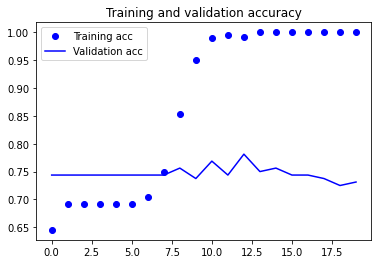

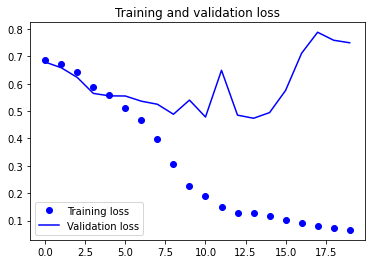

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 27ms/step - loss: 0.8148 - acc: 0.7800


[0.8147789239883423, 0.7799999713897705]

Ran on entire dataset

In [ ]:
max_words = 10000
maxlen = 200
model = Sequential()
model.add(Embedding(max_words,64,input_length = maxlen))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

In [ ]:
data_lstm = data.copy()
data_lstm['label'] = data_lstm['Star'].apply(label)
sentences = [item for item in data_lstm['Review']]
tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(len(sequences[1]))
print(len(sequences[2]))
data_input = pad_sequences(sequences, maxlen = maxlen)
labels = np.asarray(sentences)
df_final_lstm = pd.DataFrame(data_input)
df_final_lstm['label'] = data_lstm['label']

314
266


In [ ]:
data_lstm.head()

,User_id,Bus_id,Star,Useful,Cool,Funny,Review,State,City,Bus_Ave_Star,User_Review_count,User_Useful_count,User_Funny_count,User_Cool_count,Elite,User_Fans,Users_Ave_Star,label
0,4hBhtCSgoxkrFgHa4YAD-w,bbEXAEFr4RYHLlZ-HFssTA,5.0,0,0,0,"Great burgers,fries and salad! Burgers have a...",CA,Goleta,4.0,922,1687,694,1070,"2015,2016,2017,2018,2019,20,20,2021",51,4.20,1
1,JYYYKt6TdVA4ng9lLcXt_g,SZU9c8V2GuREDN5KgyHFJw,5.0,0,0,0,We were a bit weary about trying the Shellfish...,CA,Santa Barbara,4.0,338,800,144,353,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",30,4.12,1
2,Uk3X2AypU8AqvcYEVf7s6Q,eL4lyE7LNoXEMvpcJ8WNVw,3.0,5,0,0,This was a tough one! On the merits of the w...,CA,Santa Barbara,4.0,431,2126,1245,1476,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",76,4.05,0
3,LcqNuhqaYt5ekKzaRirmIg,SZU9c8V2GuREDN5KgyHFJw,5.0,2,1,0,"I love trying fresh seafood on piers, wharfs a...",CA,Santa Barbara,4.0,258,452,125,183,"2015,2016,2017",37,3.99,1
4,gasLVm0KRwrVhPGRcqATjw,CHh0ZFrQcsk4boOItr2Zuw,4.0,1,2,0,I stopped in because I was hungry for some sna...,CA,Carpinteria,3.0,1638,2658,933,2297,"2014,2015,2016,2017,2018,2019,20,20,2021",105,3.79,1


In [ ]:
X = df_final_lstm.drop(columns = ['label'])
Y = df_final_lstm['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
df_final_lstm.shape

(53845, 201)

In [ ]:
history2 = model.fit(x_train,y_train, epochs = 15, batch_size = 128, validation_split=0.2)

Epoch 1/15
270/270 [==============================] - 113s 404ms/step - loss: 0.5045 - acc: 0.7553 - val_loss: 0.3961 - val_acc: 0.8153
Epoch 2/15
270/270 [==============================] - 106s 391ms/step - loss: 0.3388 - acc: 0.8570 - val_loss: 0.3461 - val_acc: 0.8498
Epoch 3/15
270/270 [==============================] - 110s 407ms/step - loss: 0.2745 - acc: 0.8891 - val_loss: 0.3412 - val_acc: 0.8496
Epoch 4/15
270/270 [==============================] - 107s 395ms/step - loss: 0.2432 - acc: 0.9042 - val_loss: 0.3393 - val_acc: 0.8548
Epoch 5/15
270/270 [==============================] - 107s 395ms/step - loss: 0.2113 - acc: 0.9190 - val_loss: 0.3779 - val_acc: 0.8574
Epoch 6/15
270/270 [==============================] - 110s 407ms/step - loss: 0.1833 - acc: 0.9309 - val_loss: 0.3759 - val_acc: 0.8558
Epoch 7/15
270/270 [==============================] - 106s 393ms/step - loss: 0.1687 - acc: 0.9370 - val_loss: 0.4664 - val_acc: 0.8471
Epoch 8/15
270/270 [============================

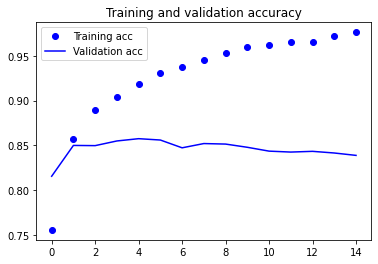

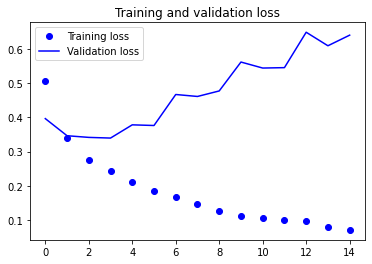

In [ ]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

337/337 [==============================] - 10s 28ms/step - loss: 0.6293 - acc: 0.8388


[0.6292725205421448, 0.8387965559959412]

Let's try with stars not label this time

In [ ]:
max_words = 10000
maxlen = 200
model = Sequential()
model.add(Embedding(max_words,64,input_length = maxlen))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(6, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 200, 64)           640000    
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_13 (Dense)            (None, 6)                 198       
                                                                 
Total params: 652,614
Trainable params: 652,614
Non-trainable params: 0
_________________________________________________________________


In [ ]:
df_final_lstm['Star'] = data_lstm['Star']
X = df_final_lstm.iloc[:,:200]
Y = df_final_lstm['Star']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2) #Test to Train ratio is 2:8

In [ ]:
history3 = model.fit(x_train,y_train, epochs = 15, batch_size = 128, validation_split=0.2)

Epoch 1/15
270/270 [==============================] - 114s 399ms/step - loss: 1.2679 - acc: 0.4357 - val_loss: 1.0796 - val_acc: 0.5158
Epoch 2/15
270/270 [==============================] - 110s 406ms/step - loss: 1.0017 - acc: 0.5467 - val_loss: 0.9611 - val_acc: 0.5721
Epoch 3/15
270/270 [==============================] - 107s 397ms/step - loss: 0.8853 - acc: 0.6093 - val_loss: 0.9682 - val_acc: 0.5765
Epoch 4/15
270/270 [==============================] - 107s 397ms/step - loss: 0.8113 - acc: 0.6463 - val_loss: 0.9619 - val_acc: 0.5811
Epoch 5/15
270/270 [==============================] - 110s 406ms/step - loss: 0.7527 - acc: 0.6757 - val_loss: 0.9842 - val_acc: 0.5740
Epoch 6/15
270/270 [==============================] - 107s 397ms/step - loss: 0.7015 - acc: 0.7034 - val_loss: 0.9923 - val_acc: 0.5616
Epoch 7/15
270/270 [==============================] - 107s 397ms/step - loss: 0.6562 - acc: 0.7284 - val_loss: 1.0238 - val_acc: 0.5681
Epoch 8/15
270/270 [============================

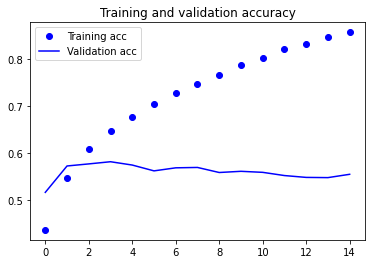

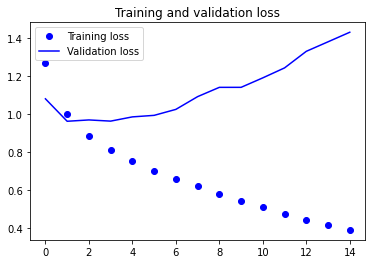

In [ ]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

337/337 [==============================] - 9s 28ms/step - loss: 1.4361 - acc: 0.5539


[1.4361037015914917, 0.5539047122001648]

Tune our random forest to its finest

In [ ]:
def compute_polarity(text):
    return TextBlob(text).sentiment.polarity
def compute_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def label(text):
    if text > 3:
        return 1
    else:
        return 0

In [ ]:
data_test = data.copy()
data_test['Review'] = data_test['Review'].apply(remove_punc_stopword)
data_test['Review'] = data_test['Review'].str.join(' ')
data_test['Review_polarity'] = data_test['Review'].apply(compute_polarity)
data_test['Review_subjectivity'] = data_test['Review'].apply(compute_subjectivity)
data_test['label'] = data_test['Star'].apply(label)

In [ ]:
X = data_test[['Useful','Cool','Funny','Bus_Ave_Star','User_Review_count','User_Useful_count','User_Funny_count','User_Cool_count','User_Fans','Users_Ave_Star','Review_polarity','Review_subjectivity']]
Y = data_test['label']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: ignored

In [ ]:
rf_random.best_params_

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 4, max_features = 'auto', max_depth = 100, bootstrap = True)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1000)

In [ ]:
y_pred = rf.predict(x_test)
print('random forest accuracy:', accuracy_score(y_test, y_pred))

random forest accuracy: 0.8211533104280806


In [ ]:
rf_original = RandomForestClassifier()
rf_original.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_original.predict(x_test)
print('original random forest accuracy:', accuracy_score(y_test, y_pred))

original random forest accuracy: 0.8147460302720773
